## Diamond Analysis

Start with basic diamond data  
- Combine with bluenile  
- Combine w/ other sources like Tiffany, etc to analyze standard diamond pricing vs premium Diamond pricing  

Migrate to Azure ML service after
 
### Step 1 Load and Clean up

In [2]:
# loading important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
 
# Loading the data
DATA_DIR = '.'
FILE_NAME = 'diamonds.csv'
data_path = os.path.join(DATA_DIR, FILE_NAME)
diamonds = pd.read_csv(data_path)
print(diamonds.shape)
print(diamonds.describe())


(53940, 11)
         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4

In [3]:
diamonds = diamonds.loc[diamonds['x'] != 0]
diamonds = diamonds.loc[diamonds['y'] != 0]
diamonds = diamonds.loc[diamonds['z'] != 0]

diamonds.shape

(53920, 11)

In [4]:
diamonds = diamonds.loc[~((diamonds['x'] > 30) | (diamonds['y'] > 30) | (diamonds['z'] > 30))]
diamonds.shape


(53917, 11)

### Stripped out the 0's and the > 30's now we are ready

In [5]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


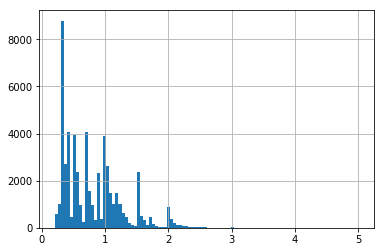

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

diamonds['carat'].hist(bins=100)

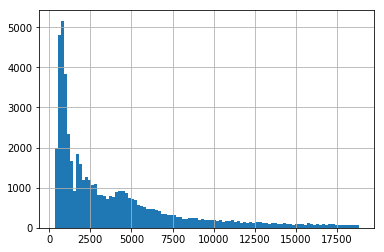

In [13]:
diamonds['price'].hist(bins=100)

Text(0, 0.5, 'Number')

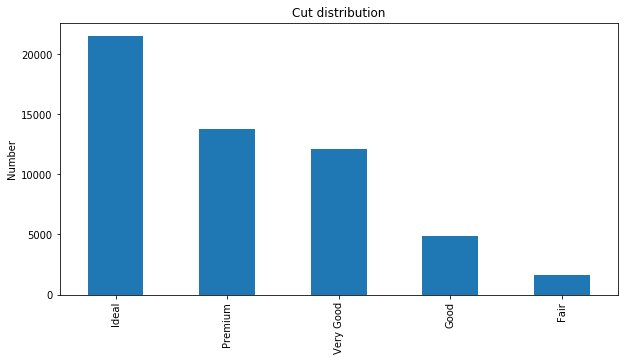

In [16]:
cuts = diamonds['cut'].value_counts()
cuts.plot(kind='bar')
plt.title('Cut distribution')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

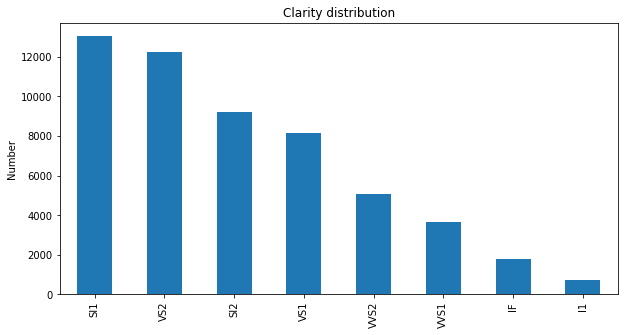

In [15]:
c = diamonds['clarity'].value_counts()
c.plot(kind='bar')
plt.title('Clarity distribution')
plt.ylabel('Number')

Text(0, 0.5, 'Number')

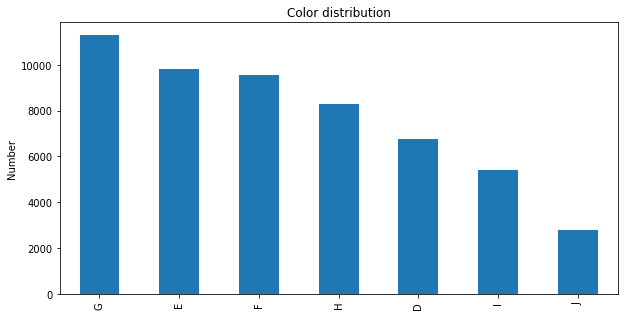

In [18]:
c = diamonds['color'].value_counts()
c.plot(kind='bar')
plt.title('Color distribution')
plt.ylabel('Number')